In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
data=pd.read_csv("Twitter_training.csv", encoding = 'ISO-8859-1')

In [4]:
data.head(25)

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,I just re-pierced my ears
8,0,1467812723,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,TLeC,@caregiving I couldn't bear to watch it. And ...
9,0,1467812771,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,robrobbierobert,"@octolinz16 It it counts, idk why I did either..."


In [5]:
data.shape

(1048572, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [7]:
# counting the number of missing values in the dataset
data.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [8]:
data.columns

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')

In [9]:
#Sometimes column names can contain unexpected leading or trailing spaces. Try using the strip() method on all column names to remove any extra spaces:
data.columns = data.columns.str.strip()

In [10]:
data['polarity of tweet'].value_counts(normalize=True)

polarity of tweet
0    0.762939
4    0.237061
Name: proportion, dtype: float64

convert the target "4" to "1"

In [11]:
data.replace({'polarity of tweet':{4:1}},inplace=True)

In [12]:
data['polarity of tweet'].value_counts()

polarity of tweet
0    799996
1    248576
Name: count, dtype: int64

0 ---> Negative Tweet
1 ---> Positive Tweet

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='polarity of tweet'>

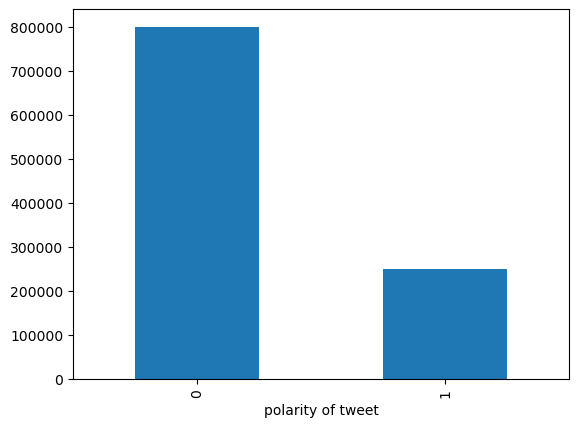

In [14]:
data['polarity of tweet'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'polarity distribution')

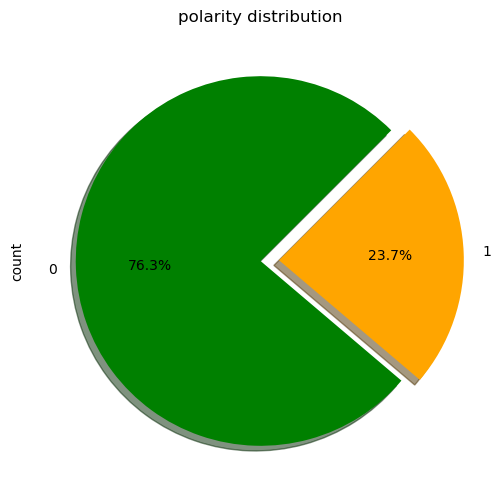

In [15]:
plt.figure(figsize=(10,6))
colors=['green','orange']
data['polarity of tweet'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow=True,colors=colors,startangle=45,explode=(0,0.1))
plt.title('polarity distribution')

# 2. DATA Cleaning Steps



In [16]:
# Removing the user mentions
data['text of the tweet'][14]

'@LettyA ahh ive always wanted to see rent  love the soundtrack!!'

In [17]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['text of the tweet'][14])

' ahh ive always wanted to see rent  love the soundtrack!!'

In [18]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'hadn', 'yourselves', 'very', 'her', 'where', 'so', 'didn', 'been', 'who', 'while', "hasn't", 'were', 'wasn', 'by', 'them', 'more', 'an', 'wouldn', 'and', 'should', 'd', 'too', 'but', 'why', 're', 'ourselves', 'being', 'at', 'does', 'you', 's', 'he', 'ours', 'further', 'for', 'out', 'between', 'when', 'once', "haven't", 'it', 'same', 'his', 'herself', 'ma', 'shouldn', 'now', 'no', 'my', "isn't", "won't", 'here', 'until', 'isn', "mightn't", 'themselves', 'am', 'has', 'of', "doesn't", "shouldn't", 'own', 'have', 'mightn', 'over', 'its', 'itself', "hadn't", 'during', 'don', 'll', "that'll", 'nor', "don't", 'on', 'with', 'to', 'your', 'up', 'from', 'only', "wouldn't", 'few', 'myself', 'himself', 'in', 'as', "needn't", 'or', 'theirs', 'our', 'how', 'we', 'shan', 'down', 'she', 'a', 'which', "should've", "it's", 'about', 'off', 'this', 'him', 'won', 'what', 'because', 'was', 'their', 'they', "you've", 'yours', 'whom', 'under', 'had', 'all', 'these', 'did', 'needn', 't', "you'd", "weren't", 

In [19]:
len(nltk_stopwords)

179

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

In [21]:
len(sklearn_stopwords)

318

In [22]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'yourselves', 'very', 'her', 'where', 'so', 'been', 'who', 'while', 'were', 'by', 'them', 'more', 'an', 'and', 'should', 'too', 'but', 'why', 're', 'ourselves', 'being', 'at', 'you', 'he', 'ours', 'further', 'for', 'out', 'between', 'when', 'once', 'it', 'same', 'his', 'herself', 'now', 'no', 'my', 'here', 'until', 'themselves', 'am', 'has', 'of', 'own', 'have', 'over', 'its', 'itself', 'during', 'nor', 'on', 'with', 'to', 'your', 'up', 'from', 'only', 'few', 'myself', 'himself', 'in', 'as', 'or', 'our', 'how', 'we', 'down', 'she', 'a', 'which', 'about', 'off', 'this', 'him', 'what', 'because', 'was', 'their', 'they', 'whom', 'yours', 'under', 'had', 'all', 'these', 'before', 'me', 'are', 'those', 'other', 'be', 'such', 'if', 'through', 'against', 'after', 'again', 'not', 'yourself', 'most', 'there', 'below', 'above', 'is', 'hers', 'each', 'than', 'then', 'some', 'that', 'the', 'do', 'into', 'both', 'can', 'i', 'will', 'any'}


In [23]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [24]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [25]:
len(combined_stopwords)

378

In [26]:
import contractions
data['text of the tweet'][14]

'@LettyA ahh ive always wanted to see rent  love the soundtrack!!'

In [27]:
contractions.fix(data['text of the tweet'][14])

'@LettyA ahh i have always wanted to see rent  love the soundtrack!!'

In [28]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [30]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['text of the tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [31]:
cleaned_tweets[:5]  

['is upset that he cannot update his facebook by texting it and might cry a a result school today also blah ',
 'i dived many time for the ball managed to save the rest go out of bound ',
 'my whole body feel itchy and like it on fire ',
 'no it is not behaving at all i am mad why am i here because i cannot see you all over there ',
 'not the whole crew ']

In [32]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet,cleaned_tweets_w/o_SW
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many time for the ball managed to save...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it is not behaving at all i am mad why am i...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew


# 3. Data Visualization

In [33]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['text of the tweet']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['is', 'upset', 'that', 'he', "can't", 'update', 'his', 'Facebook', 'by', 'texting', 'it...', 'and', 'might', 'cry', 'as', 'a', 'result', 'School', 'today', 'also.', 'Blah!', '@Kenichan', 'I', 'dived', 'many', 'times', 'for', 'the', 'ball.', 'Managed', 'to', 'save', '50%', 'The', 'rest', 'go', 'out', 'of', 'bounds', 'my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire', '@nationwideclass']


945980

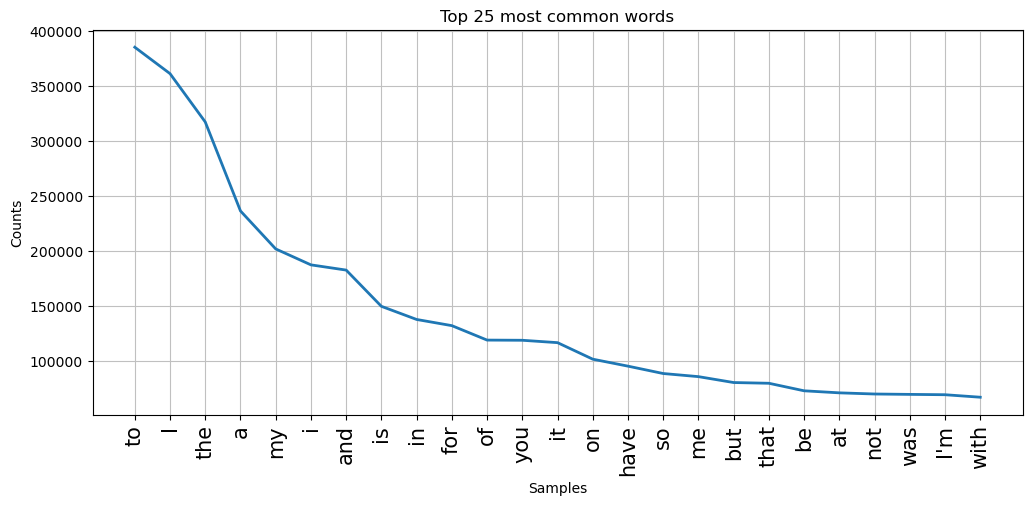

In [34]:
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

# Plot for Cleaned Tweet

In [35]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['is', 'upset', 'that', 'he', 'cannot', 'update', 'his', 'facebook', 'by', 'texting', 'it', 'and', 'might', 'cry', 'a', 'a', 'result', 'school', 'today', 'also', 'blah', 'i', 'dived', 'many', 'time', 'for', 'the', 'ball', 'managed', 'to', 'save', 'the', 'rest', 'go', 'out', 'of', 'bound', 'my', 'whole', 'body', 'feel', 'itchy', 'and', 'like', 'it', 'on', 'fire', 'no', 'it', 'is']


In [36]:
len(set(all_words)) # this is the number of unique words in the list

194104

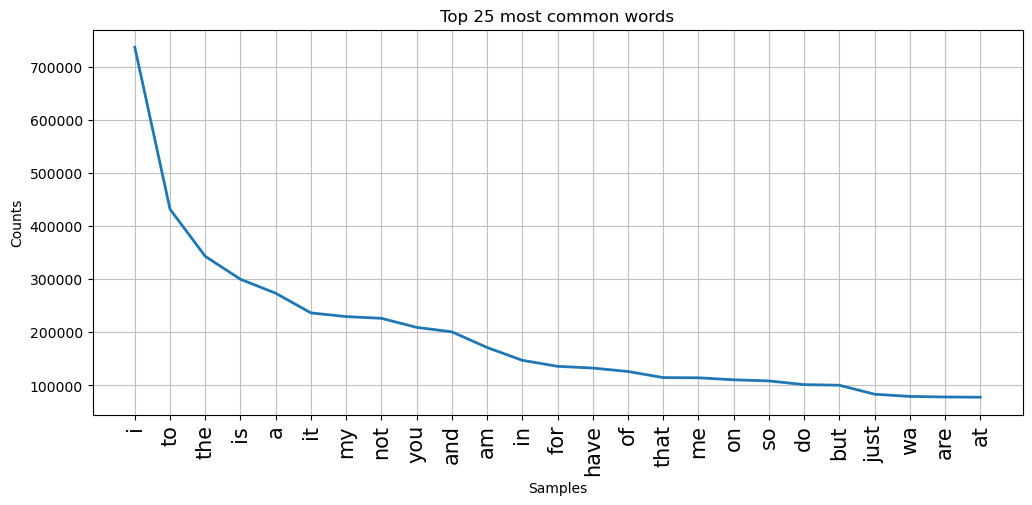

In [37]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

# DV After applying Stop words

In [38]:
type(combined_stopwords)

set

In [39]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [40]:
cleaned_tweets = list(data['text of the tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['upset update facebook texting result school today blah ', 'dived time ball managed save rest bound ', 'body feel itchy like ', 'behaving mad ', 'crew ', 'need hug ', 'hey long time yes rain bit bit lol fine thanks ', 'pierced ear ', 'bear watch thought loss embarrassing ', 'count know talk anymore ']


In [41]:
data.columns

Index(['polarity of tweet', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet', 'cleaned_tweets_w/o_SW'],
      dtype='object')

In [42]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...,upset update facebook texting result school to...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many time for the ball managed to save...,dived time ball managed save rest bound
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,body feel itchy like
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it is not behaving at all i am mad why am i...,behaving mad
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew,crew


['upset', 'update', 'facebook', 'texting', 'result', 'school', 'today', 'blah', 'dived', 'time', 'ball', 'managed', 'save', 'rest', 'bound', 'body', 'feel', 'itchy', 'like', 'behaving', 'mad', 'crew', 'need', 'hug', 'hey', 'long', 'time', 'yes', 'rain', 'bit', 'bit', 'lol', 'fine', 'thanks', 'pierced', 'ear', 'bear', 'watch', 'thought', 'loss', 'embarrassing', 'count', 'know', 'talk', 'anymore', 'gun', 'really', 'zac', 'snyder', 'doucheclown']


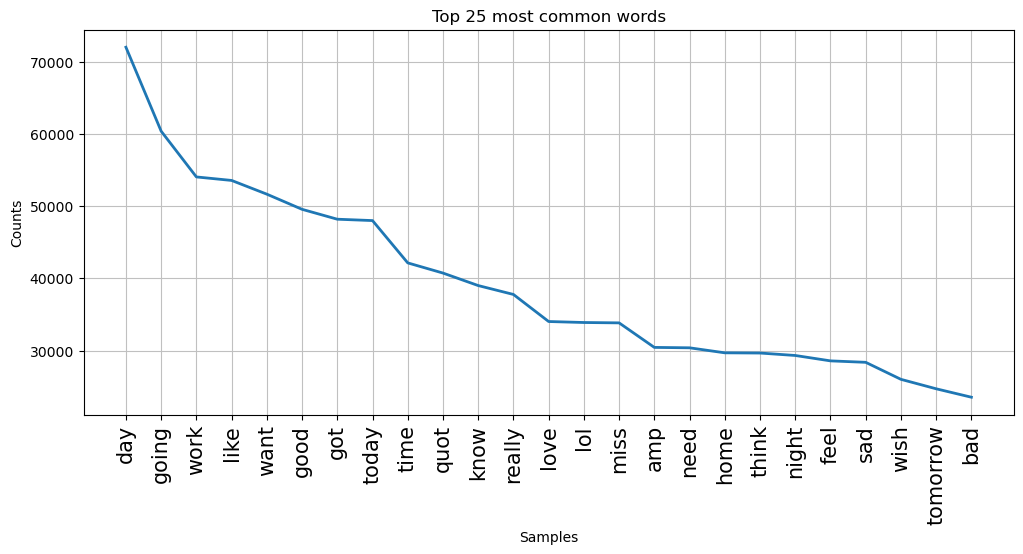

In [43]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [44]:
domain_stopwords = ['want', 'got', 'quot', 'lol', 'amp', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [45]:
data.shape

(1048572, 8)

# 4. TF-IDF vectorization
 (Feature Extraction)

In [46]:
data.shape
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

In [47]:
# Extract the text column (replace 'text_column' with the actual column name)
texts = data['cleaned_tweets_with_SW'].astype(str)
labels = data['polarity of tweet']

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [48]:
vectorizer = TfidfVectorizer(max_features=80000,  # Adjust max_features as needed
                             stop_words='english',  # Optionally remove stopwords
                             ngram_range=(1, 2))    # Optionally use bigrams along with unigrams

# Fit and transform the texts
tfidf_matrix = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for more detailed evaluation
label_names = label_encoder.classes_.astype(str)  # Ensure label_names are strings
print(classification_report(y_test, y_pred, target_names=label_names))

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {fscore:.2f}")

Accuracy: 0.816541496793267
              precision    recall  f1-score   support

           0       0.82      0.97      0.89    160130
           1       0.76      0.32      0.46     49585

    accuracy                           0.82    209715
   macro avg       0.79      0.65      0.67    209715
weighted avg       0.81      0.82      0.79    209715

Precision: 0.81
Recall: 0.82
F1-score: 0.79


In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame with 'text' as the text data and 'label' as the sentiment label
corpus = data['cleaned_tweets_with_SW'].values.astype('U')  # Convert text column to Unicode
labels = data['polarity of tweet'].values

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=80000)  # Adjust max_features as needed

# Fit and transform the vectorizer on the corpus
X = vectorizer.fit_transform(corpus)

# Check the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (1048572, 80000)


# Model Selection and Training

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


Accuracy: 0.7986, Precision: 0.7993, Recall: 0.7986, F1-score: 0.7482


# Hyperparameter Tuning with Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Naive Bayes
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Reinitialize the classifier with best parameters
best_nb_classifier = grid_search.best_estimator_

# Evaluate with best classifier
y_pred_best = best_nb_classifier.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Best Model Metrics:")
print(f"Accuracy: {accuracy_best:.4f}, Precision: {precision_best:.4f}, Recall: {recall_best:.4f}, F1-score: {f1_best:.4f}")


Best Parameters: {'alpha': 0.1}
Best Score: 0.7994485343347936
Best Model Metrics:
Accuracy: 0.8014, Precision: 0.7901, Recall: 0.8014, F1-score: 0.7620


# Cross-Validation

In [59]:
from sklearn.model_selection import cross_val_score

#Perform cross-validation with the best model
cv_scores = cross_val_score(best_nb_classifier, X, labels, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.78510836 0.79233245 0.7938192  0.79649427 0.79787234]
Mean CV Accuracy: 0.7931253254996686


# Model Interpretability (Feature Importance)

In [55]:
# Assuming 'best_nb_classifier' is your trained MultinomialNB classifier

# Get feature names from TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get feature log probabilities (coef_) for MultinomialNB
coef = best_nb_classifier.feature_log_prob_

# Print top features per class (positive and negative)
num_top_features = 10

for i, label in enumerate(best_nb_classifier.classes_):
    print(f"Top {num_top_features} features for class '{label}':")
    top_positive_features = feature_names[coef[i].argsort()[-num_top_features:][::-1]]
    print(top_positive_features)


Top 10 features for class '0':
['work' 'want' 'day' 'going' 'miss' 'today' 'like' 'got' 'know' 'sad']
Top 10 features for class '1':
['good' 'thanks' 'day' 'love' 'quot' 'going' 'lol' 'happy' 'like'
 'morning']


# Evaluation Metrics (Confusion Matrix, Precision-Recall Curve, ROC-AUC)

ROC-AUC Score: 0.8229


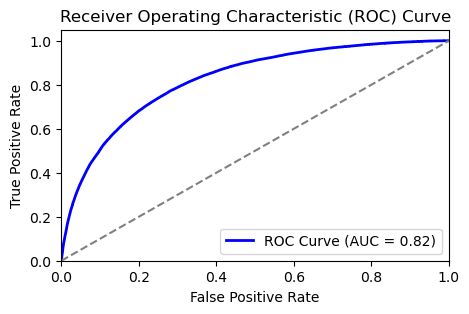

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'best_nb_classifier' is your trained MultinomialNB classifier

# Step 1: Predict probabilities for ROC-AUC calculation
y_pred_prob = best_nb_classifier.predict_proba(X_test)

# Step 2: Extract probabilities for the positive class (if binary classification)
# For multiclass, you'll need to specify 'average' parameter in roc_auc_score

# Assuming binary classification (positive class is 1)
y_pred_prob_positive = y_pred_prob[:, 1]

# Step 3: Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob_positive)

print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 4: Plot ROC Curve (optional but recommended)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("roc_sentiment_Anaylsis.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()
